# Benchmarking

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlmc import mlmc  # Assuming this is how you import the function

def benchmark_mlmc(parameter_sets, runs=5):
    """
    Benchmark the mlmc function with different parameter sets.

    Args:
        parameter_sets: List of dictionaries, each containing parameters for mlmc
        runs: Number of times to run each parameter set for averaging

    Returns:
        DataFrame with benchmark results
    """
    results = []

    for params in parameter_sets:
        total_time = 0
        total_cost = 0
        max_levels = []

        for _ in range(runs):
            start_time = time.time()
            expectation, cost, max_level, _ = mlmc(**params)
            end_time = time.time()

            total_time += (end_time - start_time)
            total_cost += cost
            max_levels.append(max_level)

        results.append({
            **params,
            'avg_execution_time': total_time / runs,
            'avg_computational_cost': total_cost / runs,
            'avg_max_level': sum(max_levels) / len(max_levels),
            'expectation': expectation  # Last computed value
        })

    return pd.DataFrame(results)

In [3]:
# Example test functions from your notebook
from test_functions import non_hom_test, test_phi, test_bound, test_rhs, test_cos, test_cos_rhs

# Define parameter sets to benchmark
parameter_sets = [
    # Varying epsilon (accuracy)
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.01, 'epsilon': 0.1},
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.01, 'epsilon': 0.025},
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.01, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.01, 'epsilon': 0.1/(4**2)},

    # Varying dt0 (initial time step)
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.02, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': test_bound, 'g': test_rhs, 'dt0': 0.005, 'epsilon': 0.01},

    # Different test functions
    {'x': 0.5, 'y': 0.5, 'f': test_cos, 'g': test_cos_rhs, 'dt0': 0.01, 'epsilon': 0.01},

    # Different coordinates
    {'x': 0.25, 'y': 0.75, 'f': test_bound, 'g': test_rhs, 'dt0': 0.01, 'epsilon': 0.01},
]

# Run benchmarks
benchmark_results = benchmark_mlmc(parameter_sets)

      x     y                                        f  \
0  0.50  0.50  <function test_bound at 0x78be88eea020>   
1  0.50  0.50  <function test_bound at 0x78be88eea020>   
2  0.50  0.50  <function test_bound at 0x78be88eea020>   
3  0.50  0.50  <function test_bound at 0x78be88eea020>   
4  0.50  0.50  <function test_bound at 0x78be88eea020>   
5  0.50  0.50    <function test_cos at 0x78be88eea0c0>   
6  0.25  0.75  <function test_bound at 0x78be88eea020>   

                                           g    dt0  epsilon  \
0      <function test_rhs at 0x78be88ee9f80>  0.010  0.10000   
1      <function test_rhs at 0x78be88ee9f80>  0.010  0.02500   
2      <function test_rhs at 0x78be88ee9f80>  0.010  0.00625   
3      <function test_rhs at 0x78be88ee9f80>  0.020  0.01000   
4      <function test_rhs at 0x78be88ee9f80>  0.005  0.01000   
5  <function test_cos_rhs at 0x78be88eea340>  0.010  0.01000   
6      <function test_rhs at 0x78be88ee9f80>  0.010  0.01000   

   avg_execution_time 

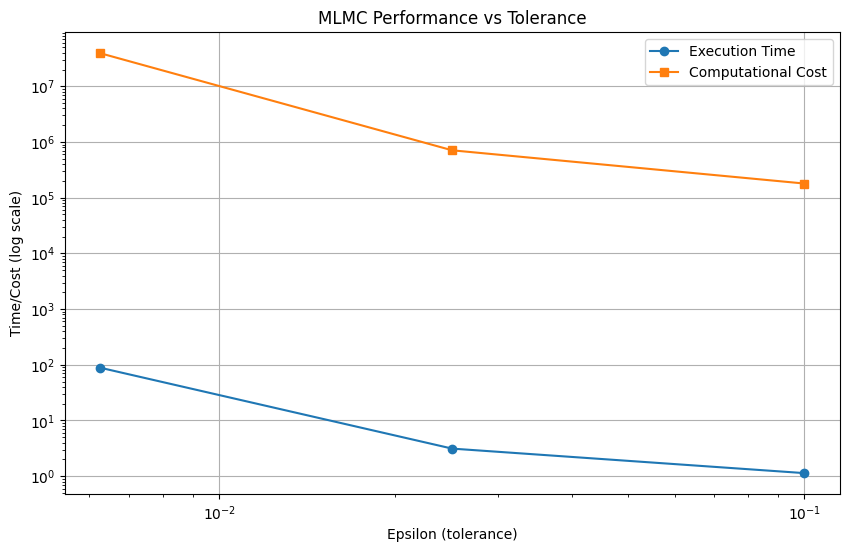

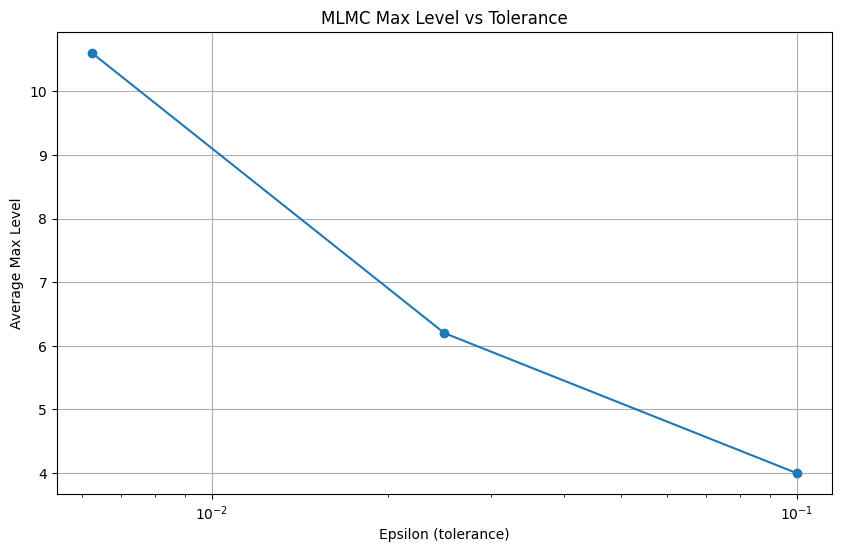

In [6]:
# Display results table
print(benchmark_results)

# Plot execution time vs epsilon
plt.figure(figsize=(10, 6))
epsilon_results = benchmark_results[benchmark_results['x'] == 0.5]
epsilon_results = epsilon_results[epsilon_results['dt0'] == 0.01]
epsilon_results = epsilon_results[epsilon_results['f'] == test_bound]
epsilon_results = epsilon_results.sort_values('epsilon')

plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_execution_time'], 'o-', label='Execution Time')
plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_computational_cost'], 's-', label='Computational Cost')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Time/Cost (log scale)')
plt.title('MLMC Performance vs Tolerance')
plt.legend()
plt.grid(True)
plt.show()

# Plot max level vs epsilon
plt.figure(figsize=(10, 6))
plt.semilogx(epsilon_results['epsilon'], epsilon_results['avg_max_level'], 'o-')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Average Max Level')
plt.title('MLMC Max Level vs Tolerance')
plt.grid(True)
plt.show()